## Problem Statement

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [128]:
# Importing the required libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Loading the dataset

df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [32]:
# To get the descriptive statistics

df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [33]:
# Getting the information about the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [34]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There are no null values in the data set for any feature.

The features like 'ShelveLoc', 'Urban' and 'US' are having categorical values. We need to handle those by Encoding.

In [35]:
df.duplicated().sum()

0

There are no duplicate entries in the data set

The feature values for 'Urban' and 'US' look like nominal variables. Hence we need to use One Hot Encoding for the same.

In [36]:
df = pd.get_dummies(df, columns = ['Urban', 'US'], drop_first = True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


Feature values for 'ShelveLoc' are pointing out that those are ordinal one. We need to use Label Encoding there.

Good    --> Highest rating --> 3

Medium  --> Second rating  --> 2

Bad     --> Third rating   --> 1

In [37]:
df.ShelveLoc.value_counts().to_dict()

{'Medium': 219, 'Bad': 96, 'Good': 85}

In [38]:
df.ShelveLoc.replace({'Medium': 2, 'Bad': 1, 'Good': 3}, inplace = True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,3,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,3,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(8), uint8(2)
memory usage: 29.0 KB


We have handled the categorical features.

In [484]:
# Seperating out the dependant and independant variables for the train_test_split

X = df.drop('Sales', axis = 1)

# To convert the continuous variables into categorical for the Sales as a target variable
# Selecting bins based on minimum and maximum sales

y = pd.cut(df.Sales, bins = [-1,10,

In [485]:
y

0       low
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399     low
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['low' < 'high']

In [486]:
# Splitting the data in to Training and Testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Building a Decision Tree Classifier Model

In [487]:
# Using gini criterion with max_depth = 3

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state = 42)

In [488]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [489]:
y_pred_test = model.predict(X_test)

In [490]:
print('Accuracy score: ', np.round(accuracy_score(y_test,y_pred_test)*100, 2), '%')

Accuracy score:  83.33 %


In [491]:
print('Confusion Matrix \n \n', confusion_matrix(y_test,y_pred_test))

Confusion Matrix 
 
 [[17  7]
 [13 83]]


In [492]:
print('Classification Report \n \n', classification_report(y_test,y_pred_test))

Classification Report 
 
               precision    recall  f1-score   support

        high       0.57      0.71      0.63        24
         low       0.92      0.86      0.89        96

    accuracy                           0.83       120
   macro avg       0.74      0.79      0.76       120
weighted avg       0.85      0.83      0.84       120



In [493]:
print('Test score:', model.score(X_test,y_test))
print('Train score:', model.score(X_train,y_train))

Test score: 0.8333333333333334
Train score: 0.8821428571428571


In [494]:
# Using entropy criterion with max_depth = 3

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 42)

In [495]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [496]:
y_pred_test = model.predict(X_test)

In [497]:
print('Accuracy score: ', np.round(accuracy_score(y_test,y_pred_test)*100, 2), '%')

Accuracy score:  86.67 %


In [498]:
print('Confusion Matrix \n \n', confusion_matrix(y_test,y_pred_test))

Confusion Matrix 
 
 [[12 12]
 [ 4 92]]


In [499]:
print('Classification Report \n \n', classification_report(y_test,y_pred_test))

Classification Report 
 
               precision    recall  f1-score   support

        high       0.75      0.50      0.60        24
         low       0.88      0.96      0.92        96

    accuracy                           0.87       120
   macro avg       0.82      0.73      0.76       120
weighted avg       0.86      0.87      0.86       120



In [500]:
print('Test score:', model.score(X_test,y_test))
print('Train score:', model.score(X_train,y_train))

Test score: 0.8666666666666667
Train score: 0.8607142857142858


In [501]:
# Plotting a decision tree 

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)

In [502]:
accuracy_score(y_test,y_pred_test)

0.7916666666666666

[Text(0.5520833333333334, 0.9444444444444444, 'X[5] <= 2.5\ngini = 0.311\nsamples = 280\nvalue = [54, 226]'),
 Text(0.2847222222222222, 0.8333333333333334, 'X[4] <= 94.5\ngini = 0.198\nsamples = 224\nvalue = [25, 199]'),
 Text(0.1111111111111111, 0.7222222222222222, 'X[0] <= 120.5\ngini = 0.467\nsamples = 35\nvalue = [13, 22]'),
 Text(0.05555555555555555, 0.6111111111111112, 'X[6] <= 28.5\ngini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(0.027777777777777776, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08333333333333333, 0.5, 'X[9] <= 0.5\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.05555555555555555, 0.3888888888888889, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.1111111111111111, 0.3888888888888889, 'X[5] <= 1.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.08333333333333333, 0.2777777777777778, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.1388888888888889, 0.2777777777777778, 'X[2] <= 11.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3

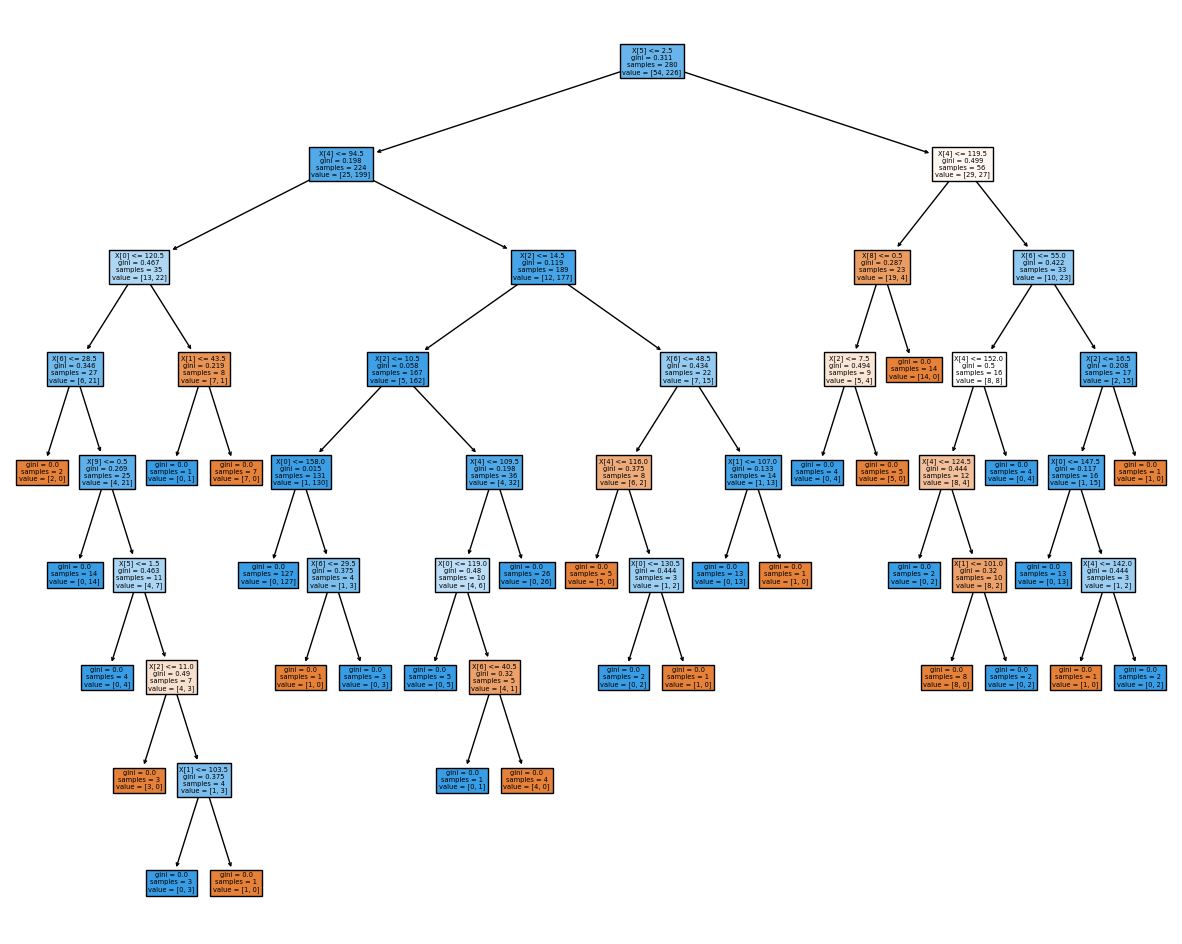

In [503]:
plt.figure(figsize = (15,12))
plot_tree(model, filled = True)

In [504]:
# We need to use prunning technique here

prun = model.cost_complexity_pruning_path(X_train,y_train)
prun

{'ccp_alphas': array([0.        , 0.00334821, 0.00354417, 0.0047619 , 0.00535714,
        0.00571429, 0.00590861, 0.00595238, 0.00621429, 0.00625   ,
        0.00663265, 0.00728079, 0.00929463, 0.00933333, 0.01180124,
        0.01414009, 0.01878401, 0.02000213, 0.02648641, 0.0528125 ]),
 'impurities': array([0.        , 0.00669643, 0.01378476, 0.01854666, 0.02390381,
        0.02961809, 0.03552671, 0.04147909, 0.06012194, 0.06637194,
        0.0730046 , 0.09484698, 0.13202548, 0.14135882, 0.1649613 ,
        0.19324148, 0.21202549, 0.23202762, 0.25851403, 0.31132653])}

In [505]:
dtcs = []

for ccp in prun.ccp_alphas:
    dtc1 = DecisionTreeClassifier(random_state = 42, ccp_alpha = ccp)
    dtc1.fit(X_train,y_train)
    dtcs.append(dtc1)

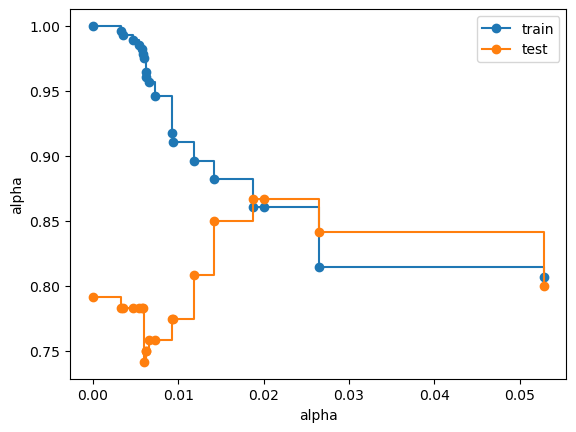

In [506]:
train_score = [dtcc.score(X_train,y_train) for dtcc in dtcs]
test_score = [dtcc.score(X_test,y_test) for dtcc in dtcs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('alpha')
ax.plot(prun.ccp_alphas, train_score, label = 'train', drawstyle = 'steps-post', marker = 'o' )
ax.plot(prun.ccp_alphas, test_score, label = 'test', drawstyle = 'steps-post', marker = 'o' )
ax.legend()
plt.show()

In [507]:
# Selecting the point of convergence from the above graph

model_con = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.02)
model_con.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=42)

In [508]:
y_pred_test = model_con.predict(X_test)

In [509]:
accuracy_score(y_test,y_pred_test)

0.8666666666666667

In [510]:
model_con.score(X_train,y_train)

0.8607142857142858

In [511]:
model_con.score(X_test,y_test)

0.8666666666666667

[Text(0.5, 0.8333333333333334, 'X[5] <= 2.5\ngini = 0.311\nsamples = 280\nvalue = [54, 226]'),
 Text(0.25, 0.5, 'X[4] <= 94.5\ngini = 0.198\nsamples = 224\nvalue = [25, 199]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.467\nsamples = 35\nvalue = [13, 22]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.119\nsamples = 189\nvalue = [12, 177]'),
 Text(0.75, 0.5, 'X[4] <= 119.5\ngini = 0.499\nsamples = 56\nvalue = [29, 27]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.422\nsamples = 33\nvalue = [10, 23]')]

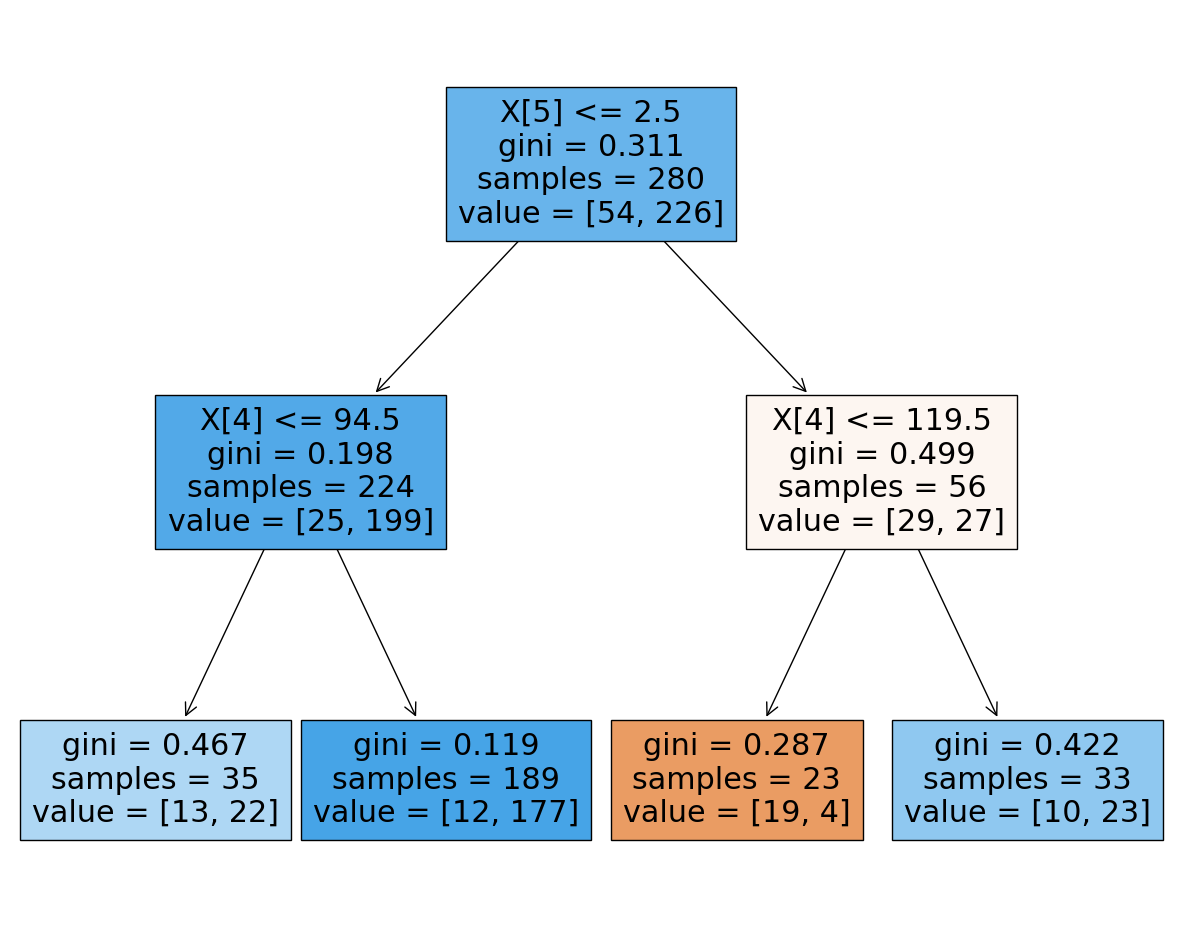

In [512]:
# Plotting the decision tree for the above model

plt.figure(figsize= (15,12))
plot_tree(model_con, filled = True)

In [513]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

        high       0.75      0.50      0.60        24
         low       0.88      0.96      0.92        96

    accuracy                           0.87       120
   macro avg       0.82      0.73      0.76       120
weighted avg       0.86      0.87      0.86       120



In [514]:
confusion_matrix(y_test,y_pred_test)

array([[12, 12],
       [ 4, 92]], dtype=int64)

In [515]:
# Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 42, max_samples=0.6)

In [516]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.6, oob_score=True, random_state=42)

In [517]:
y_pred_test = rf.predict(X_test)

In [518]:
accuracy_score(y_test,y_pred_test)

0.8916666666666667

In [519]:
rf.score(X_train,y_train)

0.9892857142857143

## Conclusion

1. Entropy criterion gives better accuracy than Gini, with max_depth = 3

2. Same accuracy can be obtained by using prunning technique

3. Random Forest Classifier gives comparatively better results.